# Is445 Final Project Individual -Clara Chen

Introduction: \
This project is designed to enhance my comprehensive understanding of the COVID-19 pandemic. The dataset includes information on the country, total cases, total deaths, total recovered cases, active cases, total tests conducted, and the population affected by COVID-19. After developing straightforward visualizations for the general public and peers, I have gained a solid understanding of the data. As a result, this individual project focuses on analyzing the data in a more statistical manner. The initial two visualizations consist of scatter plots that depict correlations: the first plot explores the relationship between population and total cases, while the second plot examines population versus total deaths. These scatter plots serve as a foundation for the subsequent step, which involves employing linear regression. The third visualization entails a scatter plot of the actual versus total recovered cases, enabling me to comprehend the statistical relationship between the cases and potentially make predictions based on the available information.

About the dataset:
1. What is the "name" of the dataset?
    'covid_worldwide.csv'
2. Where did you obtain it? 
    'kaggle'
3. Where can we obtain it? (i.e., URL) 
    https://www.kaggle.com/datasets/themrityunjaypathak/covid-cases-and-deaths-worldwide
4. What is the license of the dataset? What are we allowed to do with it? 
    License: CC0: Public Domain. 
    With a Public Domain dataset, you are allowed to freely access, use, modify, and distribute the data without any restrictions or permissions. You can analyze the dataset, derive insights, create derivative works, and incorporate the data into your own projects or research, all without the need for explicit authorization or attribution.
5. How big is it in file size and in items?
    The file is 16 KB with 231 rows and 8 columns

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
df = pd.read_csv('/Users/lindiachen/Desktop/is445/final project/data/covid_worldwide.csv')
df.head()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"


In [5]:
#size of data
num_rows = df.shape[0]
num_columns = df.shape[1]

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 231
Number of columns: 8


In [7]:
#Data Cleaning
df.dropna(axis = 0, inplace = True)
df['Total Cases'] = df['Total Cases'].astype(str).str.replace(',', '').astype(float)
df['Total Deaths'] = df['Total Deaths'].astype(str).str.replace(',', '').astype(float)
df['Total Recovered'] = df['Total Recovered'].astype(str).str.replace(',', '').astype(float)
df['Population'] = df['Population'].astype(str).str.replace(',', '').astype(float)

# Visualization 1 : Correclation between population and total cases

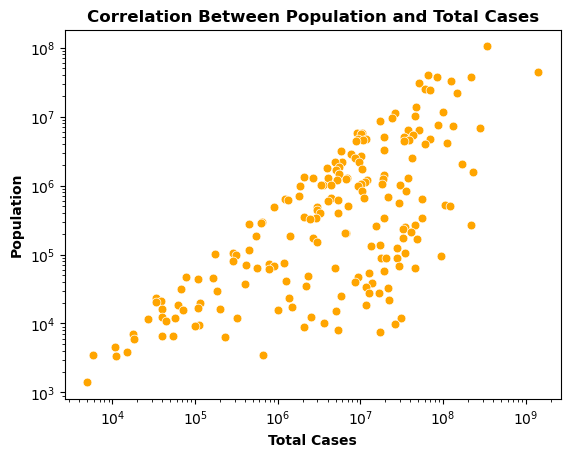

In [16]:
pop_total = sns.scatterplot(data=df, x='Population', y='Total Cases', color='orange', s=40)
pop_total.set_xscale("log")
pop_total.set_yscale("log")
pop_total.set_xlabel('Total Cases', fontweight='bold')
pop_total.set_ylabel('Population', fontweight='bold')
pop_total.set_title("Correlation Between Population and Total Cases", fontweight='heavy')

plt.show()

# Visualization 2: Correlation between population and total death

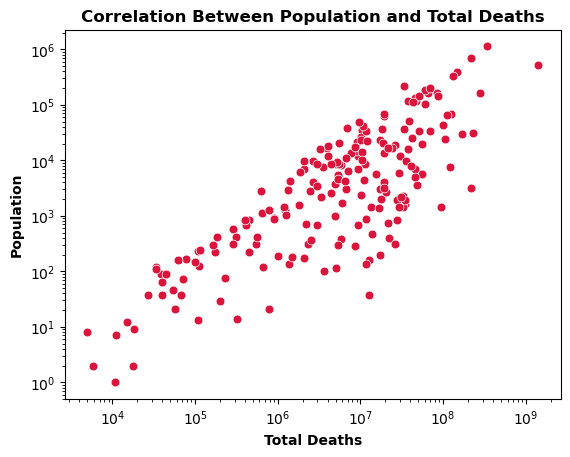

In [20]:
pop_death = sns.scatterplot(data=df, x='Population', y='Total Deaths',color='crimson', s=40)

pop_death.set_xscale("log")
pop_death.set_yscale("log")
pop_death.set_xlabel('Total Deaths', fontweight='bold')
pop_death.set_ylabel('Population', fontweight='bold')
pop_death.set_title("Correlation Between Population and Total Deaths", fontweight='heavy')

plt.show()

# Visualization 3: linear regression

In [26]:
df['population_log'] = np.log(df['Population'])
df['total_cases_log'] = np.log(df['Total Cases'])
df['total_recovered_log'] = np.log(df['Total Recovered'])

In [27]:
X = df[['population_log', 'total_cases_log']]
y = df['total_recovered_log']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [29]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [30]:
coef = regressor.coef_
intercept = regressor.intercept_

In [31]:
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)

R2 Score: 0.9626880505518123


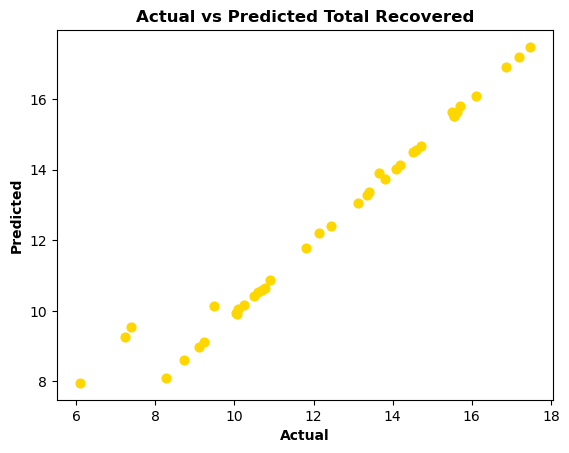

In [33]:
plt.scatter(y_test, y_pred, color='gold', s=40)
plt.xlabel('Actual', fontweight='bold')
plt.ylabel('Predicted', fontweight = 'bold')
plt.title('Actual vs Predicted Total Recovered', fontweight='heavy')

plt.show()